Prepared By [Izam Mohammed](https://github.com/izam-mohammed) 😊. Follow for more ❤️.

In [60]:
# importing the tensorflow guys

from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# nlp specific
import re
import nltk
nltk.download('all', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()

# tf things

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    SimpleRNN,
    Dropout,
    Embedding,
    Bidirectional,
    LSTM,
    GRU,
    )

import warnings
warnings.filterwarnings("ignore")

In [13]:
# getting the data

!wget -O train.csv "https://drive.google.com/uc?export=download&id=1yqTWDJoOYuFFKNDED58C-WjtB7-TtoeI"

--2024-01-14 10:36:40--  https://drive.google.com/uc?export=download&id=1yqTWDJoOYuFFKNDED58C-WjtB7-TtoeI
Resolving drive.google.com (drive.google.com)... 173.194.218.100, 173.194.218.102, 173.194.218.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1yqTWDJoOYuFFKNDED58C-WjtB7-TtoeI&export=download [following]
--2024-01-14 10:36:40--  https://drive.usercontent.google.com/download?id=1yqTWDJoOYuFFKNDED58C-WjtB7-TtoeI&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8353641 (8.0M) [application/octet-stream]
Saving to: ‘train.csv’

train.csv           100%[===================>]   7.97M  --.-KB/

In [14]:
data = pd.read_csv("train.csv")
data.sample(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2646,935,60,Warm and cozy,Love this sweater! it feels so soft and it sli...,5,1,2,General,Tops,Sweaters
16555,1065,47,Great concept that just misses the mark,I received this jumpsuit today in size medium....,4,0,1,General,Bottoms,Pants
18359,819,43,Love!,This blouse is beautiful and true to size. i w...,5,1,5,General Petite,Tops,Blouses
19010,909,47,NaN,"I just purchased this cardigan, it is better i...",5,1,1,General,Tops,Fine gauge
4745,1080,44,Go to dress,I love my new maxi dress! as soon as i put it ...,5,1,0,General,Dresses,Dresses


In [15]:
data.shape

(23486, 10)

In [17]:
# checking na

data.isna().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [18]:
data.dropna(inplace=True)

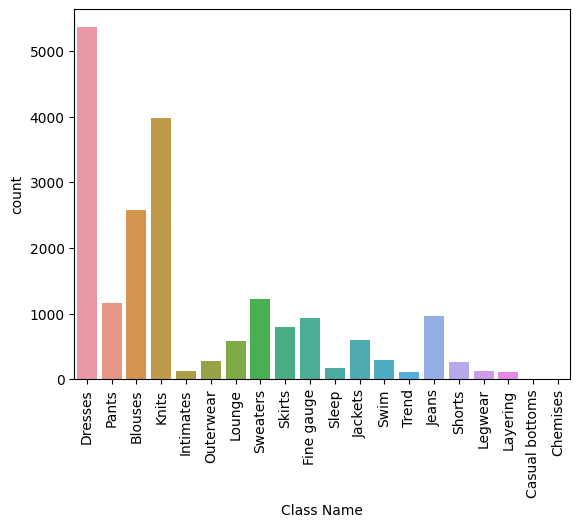

In [19]:
sns.countplot(data=data, x='Class Name')
plt.xticks(rotation=90)
plt.show()

In [20]:
# preparing

def filter_score(rating):
    return int(rating > 3)

features = ['Class Name', 'Title', 'Review Text']

X = data[features]
y = data['Rating']
y = y.apply(filter_score)

In [22]:
X.head()

,Class Name,Title,Review Text
2,Dresses,Some major design flaws,I had such high hopes for this dress and reall...
3,Pants,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,Blouses,Flattering shirt,This shirt is very flattering to all due to th...
5,Dresses,Not for the very petite,"I love tracy reese dresses, but this one is no..."
6,Knits,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...


In [23]:
# functions cleaning the data

def toLower(data):
    """converts to lower characters"""
    if isinstance(data, float):
        return '<UNK>'
    else:
        return data.lower()

stop_words = stopwords.words("english")

def remove_stopwords(text):
    """remove all of the stopwords"""
    no_stop = []
    for word in text.split(' '):
        if word not in stop_words:
            no_stop.append(word)
    return " ".join(no_stop)

def remove_punctuation_func(text):
    """remove all of the punctuations"""
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

In [24]:
# applying the cleaning

# convert into lower case
X['Title'] = X['Title'].apply(toLower)
X['Review Text'] = X['Review Text'].apply(toLower)

# remove common words
X['Title'] = X['Title'].apply(remove_stopwords)
X['Review Text'] = X['Review Text'].apply(remove_stopwords)

# lemmatization
X['Title'] = X['Title'].apply(lambda x: lemm.lemmatize(x))
X['Review Text'] = X['Review Text'].apply(lambda x: lemm.lemmatize(x))

# remove punctuation
X['Title'] = X['Title'].apply(remove_punctuation_func)
X['Review Text'] = X['Review Text'].apply(remove_punctuation_func)

X['Text'] = list(X['Title']+X['Review Text']+X['Class Name'])

In [25]:
X["Text"].head()

2    major design flawshigh hopes dress really want...
3    favorite buy love  love  love jumpsuit  fun  f...
4    flattering shirtshirt flattering due adjustabl...
5    petitelove tracy reese dresses  one petite  5 ...
6    cagrcoal shimmer funaded basket hte last mintu...
Name: Text, dtype: object

In [26]:
y.head()

2    0
3    1
4    1
5    0
6    1
Name: Rating, dtype: int64

In [27]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X['Text'], y, test_size=0.25, random_state=42)

In [71]:
# tokenizing the words

tokenizer = Tokenizer(
    num_words = 10000,
    oov_token = "<OOV>",
)
tokenizer.fit_on_texts(X_train)

In [34]:
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

len(train_seq),

(14746,)

In [45]:
# giving padding

train_pad = pad_sequences(train_seq,
                          maxlen=40,
                          truncating="post",
                          padding="post")
test_pad = pad_sequences(test_seq,
                         maxlen=40,
                         truncating="post",
                         padding="post")

In [46]:
train_pad[0]

array([   4,   24,  208, 8637,  247,  196,  292, 1040,  109,  103, 2233,
       5105, 1040, 3191,  105,  266,   53,  196,   84,   45,   77,  152,
        251,  380,   59,  353,   71,  103,   59,   39,   99,   72, 8638,
          0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [56]:
# building the model

model = Sequential([
    Embedding(
        name = "Embedding_layer",
        input_dim = 10000,
        output_dim = 128,
    ),
    SimpleRNN(
        name = "RNN_layer-1",
        units = 64,
        return_sequences = True,
    ),
    SimpleRNN(
        name = "RNN_layer-2",
        units = 64,
    ),
    Dense(
        name = "Dense_layer-1",
        units = 128,
        activation = "relu",
    ),
    Dropout(
        name = "Droput_for_Dense-1",
        rate = 0.4,
    ),
    Dense(
        name = "Output_layer",
        units = 1,
        activation = "sigmoid",
    ),
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding_layer (Embedding  (None, None, 128)         1280000   
 )                                                               
                                                                 
 RNN_layer-1 (SimpleRNN)     (None, None, 64)          12352     
                                                                 
 RNN_layer-2 (SimpleRNN)     (None, 64)                8256      
                                                                 
 Dense_layer-1 (Dense)       (None, 128)               8320      
                                                                 
 Droput_for_Dense-1 (Dropou  (None, 128)               0         
 t)                                                              
                                                                 
 Output_layer (Dense)        (None, 1)                

In [57]:
# compile and train

model.compile("adam",
              "binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_pad,
                    y_train,
                    epochs=5)

Epoch 1/5
461/461 [==============================] - 27s 52ms/step - loss: 0.4554 - accuracy: 0.8093
Epoch 2/5
461/461 [==============================] - 24s 51ms/step - loss: 0.2895 - accuracy: 0.8871
Epoch 3/5
461/461 [==============================] - 25s 55ms/step - loss: 0.2177 - accuracy: 0.9201
Epoch 4/5
461/461 [==============================] - 25s 53ms/step - loss: 0.2017 - accuracy: 0.9306
Epoch 5/5
461/461 [==============================] - 24s 53ms/step - loss: 0.1684 - accuracy: 0.9426


In [61]:
# what happens if used the lstm with same problem

model_lstm = Sequential([
    Embedding(
        name = "Embedding_layer",
        input_dim = 10000,
        output_dim = 128,
    ),
    Bidirectional(LSTM(
        name = "Bidirectional_LSTM-1",
        units = 64,
        return_sequences = True,
    )),
    Bidirectional(LSTM(
        name = "Bidirectional_LSTM-2",
        units = 64,
    )),
    Dense(
        name = "Dense_layer-1",
        units = 128,
        activation = "relu",
    ),
    Dropout(
        name = "Droput_for_Dense-1",
        rate = 0.4,
    ),
    Dense(
        name = "Output_layer",
        units = 1,
        activation = "sigmoid",
    ),
])

model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding_layer (Embedding  (None, None, 128)         1280000   
 )                                                               
                                                                 
 bidirectional (Bidirection  (None, None, 128)         98816     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 Dense_layer-1 (Dense)       (None, 128)               16512     
                                                                 
 Droput_for_Dense-1 (Dropou  (None, 128)               0         
 t)                                                   

In [62]:
# compile and train

model_lstm.compile("adam",
              "binary_crossentropy",
              metrics=["accuracy"])
history = model_lstm.fit(train_pad,
                    y_train,
                    epochs=5)

Epoch 1/5
461/461 [==============================] - 84s 163ms/step - loss: 0.3282 - accuracy: 0.8626
Epoch 2/5
461/461 [==============================] - 79s 171ms/step - loss: 0.2059 - accuracy: 0.9209
Epoch 3/5
461/461 [==============================] - 90s 195ms/step - loss: 0.1427 - accuracy: 0.9464
Epoch 4/5
461/461 [==============================] - 82s 177ms/step - loss: 0.0905 - accuracy: 0.9669
Epoch 5/5
461/461 [==============================] - 68s 147ms/step - loss: 0.0521 - accuracy: 0.9813


In [77]:
# implementing the bidirectional GRU

model_gru = Sequential([
    Embedding(
        name = "Embedding_layer",
        input_dim = 10000,
        output_dim = 128,
    ),
    Bidirectional(GRU(
        name = "Bidirectional_GRU-1",
        units = 64,
        return_sequences = True,
    )),
    Bidirectional(GRU(
        name = "Bidirectional_GRU-2",
        units = 64,
    )),
    Dense(
        name = "Dense_layer-1",
        units = 128,
        activation = "relu",
    ),
    Dropout(
        name = "Droput_for_Dense-1",
        rate = 0.4,
    ),
    Dense(
        name = "Output_layer",
        units = 1,
        activation = "sigmoid",
    ),
])

model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding_layer (Embedding  (None, None, 128)         1280000   
 )                                                               
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 128)         74496     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                                 
 Dense_layer-1 (Dense)       (None, 128)               16512     
                                                                 
 Droput_for_Dense-1 (Dropou  (None, 128)               0         
 t)                                                   

In [78]:
# compile and train

model_gru.compile("adam",
              "binary_crossentropy",
              metrics=["accuracy"])
history = model_gru.fit(train_pad,
                    y_train,
                    epochs=5)

Epoch 1/5
461/461 [==============================] - 125s 136ms/step - loss: 0.3342 - accuracy: 0.8556
Epoch 2/5
461/461 [==============================] - 61s 132ms/step - loss: 0.2027 - accuracy: 0.9189
Epoch 3/5
461/461 [==============================] - 61s 133ms/step - loss: 0.1454 - accuracy: 0.9444
Epoch 4/5
461/461 [==============================] - 62s 134ms/step - loss: 0.0951 - accuracy: 0.9674
Epoch 5/5
461/461 [==============================] - 61s 132ms/step - loss: 0.0622 - accuracy: 0.9784


In [74]:
# predicting in new lines

lines = np.array([
    "He is a good guy",
])

tokenized = tokenizer.texts_to_sequences(lines)
padded = pad_sequences(tokenized,
                      maxlen=40,
                      truncating="post",
                      padding="post")

padded

array([[6316,  441,  421,   62, 6995,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0]], dtype=int32)

In [75]:
prediction = model_lstm.predict(padded)
prediction

1/1 [==============================] - 2s 2s/step


array([[0.8335469]], dtype=float32)

That's it thanks a lot